# <center>MDI341 - TP Chaînes de Markov & HMMs - 2017/2018</center>  
## <center>Alexandre Durand</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fonctions utiles
***

##### cumsum : fonction de répartition : somme cumulative des termes du vecteur p
```python
np.cumsum(p)```

##### random : génère un nombre aléatoire entre [0 1] selon une loi uniforme
```python
np.random.random()```

##### load : chargement d’un fichier
```python
filename_A= 'bigramenglish.txt'
np.loadtxt(filename_A)```

##### Création du dictionnaire clé-valeur associant états et caractères :
```python
dic = {'1': ' ', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i', '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r' , '20': 's', '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x' , '26': 'y', '27': 'z', '28': ' ' }
```

##### Inverser le dictionnaire (les valeurs deviennent les clés et réciproquement)
```python
dic_inv = {v: k for k, v in dic.items()}```


In [2]:
# Création du dictionnaire clé-valeur associant états et caractères :
dic = {'1': ' ', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i',
       '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r' , '20': 's',
       '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x' , '26': 'y', '27': 'z', '28': ' ' }
print(dic)

{'1': ' ', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i', '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r', '20': 's', '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x', '26': 'y', '27': 'z', '28': ' '}


# Partie 1 : Chaînes de Markov
***

## Question a) Matrice de transitions

'bigramenglish.txt' contient la matrice des transitions pour l’anglais (bigrams) entre deux symboles (caractères ou espaces). Le terme générique $(i,j)$ de la matrice de transition correspond à la probabilité de transiter vers l’état $j$ à partir de l’état $i$.

A quelles probabilités correspond la première ligne de la matrice de transition ? et celles de la dernière colonne ?  
Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre.

In [3]:
# Chargement de la matrice de probabilité de transition pour l'anglais
filename_A = 'bigramenglish.txt'
A = np.loadtxt(filename_A)
print("shape of A =", A.shape)

shape of A = (28, 28)


In [4]:
# Etude de la première ligne de A
print("Première ligne de A :\n", A[0, :], "\n")
print("==> transition depuis 'etat initial' la plus problable : état", np.argmax(A[0, :])+1, "\n")

# Etude de la dernière colonne de A
print("Dernière colonne de A :\n", A[:, -1], "\n")
print("==> transition précédant 'etat final' la plus problable : état", np.argmax(A[1:27, -1])+2)
print(" (hormis la transition 'etat final' -> 'etat final', qui est avec proba=1)")

Première ligne de A :
 [  0.00000000e+00   1.12687200e-01   4.36089430e-02   4.54545450e-02
   3.29044510e-02   2.20944950e-02   4.17633410e-02   1.55557900e-02
   6.44378820e-02   6.89200590e-02   3.63847290e-03   4.21851930e-03
   2.34655140e-02   3.97595440e-02   2.28327360e-02   7.03438090e-02
   3.10588480e-02   1.42375030e-03   2.56802360e-02   6.69162620e-02
   1.64522250e-01   1.03881040e-02   7.06601980e-03   7.05020040e-02
   1.05462980e-04   1.05990300e-02   5.27314910e-05   0.00000000e+00] 

==> transition depuis 'etat initial' la plus problable : état 21 

Dernière colonne de A :
 [  0.00000000e+00   6.74781690e-02   7.10844330e-03   1.95352240e-02
   5.98843730e-01   3.60473790e-01   3.96539630e-01   3.15667360e-01
   1.03009260e-01   2.46066080e-02   9.58772770e-04   3.72256370e-01
   1.53382550e-01   1.57957610e-01   2.94218720e-01   1.23081740e-01
   6.42220840e-02   1.39664800e-03   2.10889120e-01   4.30301560e-01
   2.22730590e-01   3.84665820e-02   9.91080280e-05   

#### Réponses :
> La première ligne de la matrice de transition correspond aux probabilités de passer de l'état 1 (espace initial) vers un des 28 états possibles.  
On peut remarquer que $a_{1,1}$ et $a_{1,28}$ sont nulles, c'est à dire qu'il est impossible, pour un mot, d'avoir un espace initial (état 1) suivi par un autre espace initial (état 1) ou par un espace final (état 28).  
Autrement dit, **la première ligne montre les chances qu'un mot commence par chacune des 26 lettres de l'alphabet.  
C'est la lettre 't' (état 21) qui a le plus de chance de commencer un mot.**
  
  

> La dernière colonne de la matrice de transition correspond aux probabilités que chacun des 28 états disponibles amène ensuite à l'état 28 (espace final).  
On retrouve que $a_{1,28} = 0$, c'est-à-dire qu'un espace final ne peut pas être précédé d'un espace initial.  
On voit également que $a_{28,28} = 1$, c'est-à-dire qu'un espace final induit avec probabilité de $1$ un autre espace final. C'est normal car, avec ce modèle de bigrammes, quand on arrive à la fin d'un mot, on ne veut plus changer d'état.  
Enfin **$\mathbf{[a_{2,28}, \ a_{27,28}]}$ représente les chances qu'un mot se termine par chacune des 26 lettres de l'alphabet.  
On peut voir que c'est la lettre 'y' qui a le plus de chance de terminer un mot.**

In [5]:
# Pour chaque lettre de l’alphabet, indiquer la transition la plus fréquente depuis cette lettre

print('Transition la plus fréquente depuis chaque lettre :')

most_probable_next_state = np.argmax(A[1:27, :], axis=1) + 1
list_alphabet = [x for x in 'abcdefghijklmnopqrstuvwxyz']

for idx, c in enumerate(list_alphabet):
    most_probable = most_probable_next_state[idx]
    print(c, "==>", most_probable, "= '%s'" % dic[str(most_probable)])

Transition la plus fréquente depuis chaque lettre :
a ==> 15 = 'n'
b ==> 6 = 'e'
c ==> 16 = 'o'
d ==> 28 = ' '
e ==> 28 = ' '
f ==> 28 = ' '
g ==> 28 = ' '
h ==> 6 = 'e'
i ==> 15 = 'n'
j ==> 16 = 'o'
k ==> 28 = ' '
l ==> 6 = 'e'
m ==> 6 = 'e'
n ==> 28 = ' '
o ==> 15 = 'n'
p ==> 6 = 'e'
q ==> 22 = 'u'
r ==> 6 = 'e'
s ==> 28 = ' '
t ==> 9 = 'h'
u ==> 19 = 'r'
v ==> 6 = 'e'
w ==> 2 = 'a'
x ==> 21 = 't'
y ==> 28 = ' '
z ==> 6 = 'e'


## Question b) Générer un mot

On veut générer un mot à partir de l’état initial 1 (espace de début de mot).

Ecrire une fonction ```etat_suivant``` qui génère un état (à $t+1$) à partir de l’état courant (à $t$) et à l’aide de la matrice de transitions et de la fonction de répartition.

Afficher sur un graphique la fonction de répartition pour une ligne de la matrice de transition et expliquer son rôle pour la génération de l’état à $t+1$.

Utiliser cette fonction pour écrire la fonction ```genere_state_seq``` qui génère une séquence d’états jusqu’à aboutir à l’état final ($28$). Ecrire une fonction ```display_seq``` qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire.

Utiliser ces fonctions pour générer des mots et donner des exemples de mots générés.

In [6]:
def etat_suivant(q_t, A):
    
    assert(q_t >= 1 and q_t <= A.shape[0])  # Verification que q_t est bien un état existant
    
    # Somme cumulée des transitions pour l'état q_t
    cumsum_A_q_t = np.cumsum(A[q_t-1])  # -1 car index de A = 0..27 
    
    # Tirage d'un nombre aléatoire dans [0,1] selon une loi uniforme
    r = np.random.random()
    
    # Trouve la transition correspondante
    q_tplus1 = sum((cumsum_A_q_t < r)) + 1
    
    return q_tplus1

In [7]:
# Test de transition depuis la lettre 't' (etat 21)
etat_suivant(21, A)

9

**Graphique de la fonction de répartition pour une ligne de la matrice de transition**
> Vous pouvez modifier la valeur de l'état courant (q_t),  
> ou relancer la cellule pour avoir un autre tirage aléatoire (r)

Etat courant : 21
Somme cumulative pour l'état 21 : 
[ 0.          0.03594862  0.03596119  0.03973202  0.03985771  0.12432439
  0.12482717  0.12483974  0.46421479  0.55370925  0.55372182  0.55373438
  0.56680661  0.56781216  0.5693205   0.65818648  0.65831218  0.65832475
  0.68874281  0.7093567   0.72883934  0.74744212  0.74745469  0.75650469
  0.75651726  0.77725685  0.77726942  1.00000001]

Nombre aléatoire dans [0,1] : r = 0.8220833089233571


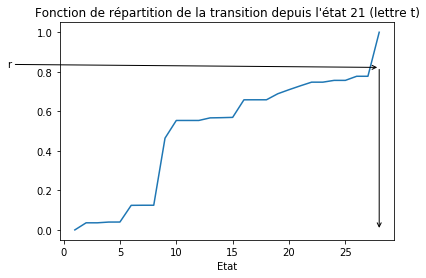

  ===> Etat suivant : 28


In [8]:
# définition d'un état courant q_t  (tester d'autres valeurs dans [1, 28] !)
q_t = 21

# Somme cumulée
cumsum_A_q_t = np.cumsum(A[q_t-1])

# Tirage aléatoire
r = np.random.random()

# Trouve l'état suivant
q_tplus1 = sum((cumsum_A_q_t < r)) + 1


# Affichage
print("Etat courant :", q_t)
print("Somme cumulative pour l'état %s : \n%s\n" % (q_t, cumsum_A_q_t))
print("Nombre aléatoire dans [0,1] : r =", r)

f, ax = plt.subplots()
ax.plot(np.arange(1, 29), cumsum_A_q_t)
ax.annotate("r", xy=(q_tplus1, r), xytext=(-5, r), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(q_tplus1, 0), xytext=(q_tplus1, r), arrowprops=dict(arrowstyle="->"))
plt.title("Fonction de répartition de la transition depuis l'état %s (lettre %s)" % (q_t, dic[str(q_t)]))
plt.xlabel("Etat")
plt.show()

print("  ===> Etat suivant :", q_tplus1)

#### Explication :
> 1) On affiche la fonction de répartition pour l'état courant (c'est-à-dire la somme cumulée des termes de A pour la ligne correspondant à l'état courant q_t)

> 2) On tire un nombre aléatoire entre 0 et 1 (r sur le graphique)

> 3) On détermine l'état suivant en regardant l'état à droite de l'intersection entre la fonction de répartition et l'axe horizontal créé par r.

**Ecrire la fonction ```genere_state_seq``` qui génère une séquence d’états jusqu’à aboutir à l’état final (28)**

In [9]:
def genere_state_seq(A):
    
    seq = [1]  # création d'une liste commencant par l'état inital
    
    # Génération des états suivants jusqu'à tomber sur l'état final
    while seq[-1] != A.shape[0]:
        next_state = etat_suivant(seq[-1], A)
        seq.append(next_state)
    
    return seq

In [10]:
# Test
genere_state_seq(A)

[1, 3, 6, 13, 6, 28]

**Ecrire une fonction ```display_seq``` qui transforme une séquence d’états en séquence de caractères, à l’aide d’un dictionnaire**

In [11]:
def display_seq(state_seq, dic):
    char_seq = [dic[str(q)] for q in state_seq]
    return ''.join(char_seq)

**Donner des exemples de mots générés**

In [12]:
# Test de génération de mots
nb_mots = 10  # Modifier à souhait

print("Exemples de mots générés :")
for i in range(nb_mots):
    state_seq = genere_state_seq(A)
    char_seq = display_seq(state_seq, dic)
    print(char_seq, "<==", state_seq)

Exemples de mots générés :
 fr  <== [1, 7, 19, 28]
 ierndie  <== [1, 10, 6, 19, 15, 5, 10, 6, 28]
 uloviowirkn  <== [1, 22, 13, 16, 23, 10, 16, 24, 10, 19, 12, 15, 28]
 chamaly  <== [1, 4, 9, 2, 14, 2, 13, 26, 28]
 ys  <== [1, 26, 20, 28]
 t  <== [1, 21, 28]
 d  <== [1, 5, 28]
 brin  <== [1, 3, 19, 10, 15, 28]
 d  <== [1, 5, 28]
 fof  <== [1, 7, 16, 7, 28]


## Question c) Générer une phrase

On veut générer une suite de mots (phrase).

Créer un état final de phrase (état $29$, correspondant au caractère . ) dont la probabilité de transition vers cet état depuis un état final de mot est $0.1$.  
Ecrire une fonction ```modifie_mat_dic``` qui modifie la matrice de transition et le dictionnaire en conséquence.

Donner des exemples de phrases générées.

In [13]:
def modifie_mat_dic(A, dic):
    
    '''
    Fonction qui rajoute un état : 'etat final de phrase' à une matrice de transition A et un dictionnaire
    '''
    
    # Modification de A
    # -----------------
    A_modif = np.zeros((A.shape[0]+1, A.shape[1]+1))
    
    # on garde identique les 27 premières lignes de A (transitions depuis état initial + les 26 lettres de l'alphabet)
    A_modif[0:27, 0:28] = A[0:27, 0:28]
    
    # on passe a_28,1 à 0.9 (proba de passer d'un 'état final de mot' à un 'état initial de mot')
    A_modif[27, 0] = 0.9
    
    # on passe a_28,29 à 0.1 (proba de passer d'un 'état final de mot' à un 'état final de phrase')
    A_modif[27, 28] = 0.1
    
    # on passe a_29,29 à 1 (proba de passer d'un 'état final de phrase' à un 'état final de phrase')
    A_modif[-1, -1] = 1
    
    
    # Modification du dictionnaire
    # ----------------------------
    dic_modif = dic.copy()
    dic_modif['29'] = '.'
    
    return A_modif, dic_modif

In [14]:
# Vérifications
A_modif, dic_modif = modifie_mat_dic(A, dic)

print("A_modif shape :", A_modif.shape)
print("Somme de chaque ligne :\n", np.sum(A_modif, axis=1))
print()
print("Longueur du dictionnaire modifié :", len(dic_modif))
print("Caractère correspondant au 29eme état : '%s' " % dic_modif['29'])

A_modif shape : (29, 29)
Somme de chaque ligne :
 [ 1.          1.          1.          1.          1.          1.          1.
  1.          1.00000001  1.00000001  1.          1.          0.99999999
  1.          1.          1.          1.          1.          1.
  0.99999999  1.00000001  1.          1.          1.00000001  0.99999999
  1.          1.          1.          1.        ]

Longueur du dictionnaire modifié : 29
Caractère correspondant au 29eme état : '.' 


#### Utilisation du nouveau Dictionnaire et Matrice de Transitions pour générer des phrases :

In [15]:
# Test de génération de phrases
Nb_phrases = 10

for i in range(Nb_phrases):
    char_seq = display_seq(genere_state_seq(A_modif), dic_modif)
    print(char_seq + "\n")

 ed  the  poof  metherofedabrgones .

 y  ns  ama  ig  ine  fach  athege  bi  fr  ceea  thremar  ghen  wes  ndem  an  ans  e  m  trnar  aty  cre  tereren  icks  mo  beay  s  h  t  ioupmily  amupe  oxpo  tererkn  ton  cexcad  fo  chee  hinoftan  willy  ar  rof .

 ana  no  and  te  stime  pry  f  letinft  s  idy  wace  t  cerane  ionk  d  te  delansle  thes  aterker .

 d  ide  me  poy  cobey  is  datin  waver  t  tcacat  scocatestin  reg  luth  ctthavesththisuil  ad  ofourd  adofor  is  is  om  woff  a  tin  ang  th  chesen  thas  ty  d  vatoms .

 m  asa  shawistr  d  wained  w  f  oren  ar  keica  crus .

 oncas  rd  h  ce  ille  s  waleatarer  dand  cof  tirke  ks  rorove  cof  tof .

 sed  lld  ns  ire  inge  in  gimomeny  ckise  t  t  fengan  therd  bithery .

 g  oouicualereat  isofongifucasen  ch  anang  od  histwhurvem .

 oves  blicerat  f  res  y  armabtengu .

 iceaily  fa  n  t  te .



#### Conclusion :
> On peut remarquer par exemple que :
- les mots commencent régulièrement par 't' (comme vu à la 1ère question)
- les mots finissent régulièrement par 'y' (comme vu à la 1ère question)
- les 't' sont régulièrement suivies d'un 'h'
- les 'a' sont régulièrement suivies d'un 'n'
- parfois des vrais mots apparaissent.

> Tous ces indices semblent confirmer que notre implémentation est correcte.

### Question I.3. Reconnaissance de la langue

**Charger la matrice des transitions entre caractères pour le français.**

In [16]:
# Chargement de la matrice de probabilité de transition pour le français
filename_B = 'bigramfrancais.txt'
A_fr = np.loadtxt(filename_B)

In [17]:
# Modification de la matrice A_fr pour pouvoir générer des phrases.
A_fr_modif, dic_modif = modifie_mat_dic(A_fr, dic)

# Vérification
print("A_fr_modif shape =", A_fr_modif.shape)
print("Somme de chaque ligne :\n", np.sum(A_fr_modif, axis=1))

A_fr_modif shape = (29, 29)
Somme de chaque ligne :
 [ 0.99999999  1.          1.00000001  1.          0.99999999  1.          1.
  1.          1.          0.99999999  0.99999999  1.          0.99999999
  0.99999999  1.          1.          1.00000001  1.          0.99999999
  0.99999999  1.          1.          1.          1.          0.99999999
  1.          0.99999999  1.          1.        ]


In [18]:
# Test de génération de phrases depuis le modèle francais
Nb_phrases = 5

for i in range(Nb_phrases):
    char_seq = display_seq(genere_state_seq(A_fr_modif), dic_modif)
    print(char_seq + "\n")

 lstiotesas  des  veteme .

 l  leetibuenerogajn  anilillontes  nor  e  s  s  deu .

 cedecemetreprchonoutit  ppliogibimise  dentense  l  ls  d  prericen  pr  ucemeure  nsont  login  louire  len  licale  n  pau  ute  u  dunoimmmiviont  e  lont .

 e .

 plesys  oginoge  dogintioit  u  casont  qus  lescoue  oribifirireres  linontrmerosys  n  d  s  t  nt  qus .



**Ecrire une fonction ```calc_vraisemblance``` qui calcule la vraisemblance du modèle français pour une phrase donnée en multipliant les probabilités de transition. Pour tenir compte de toutes les transitions (notamment celles entre espaces de fin et de début de mots et vers la fin de phrase) on pourra transformer une séquence « mot1 mot2.» par la séquence « -mot1+-mot2+.», les signes - , + et . représentant l’état initial de mot, l’état final de mot et l’état final de phrase, respectivement.**

In [19]:
# Nouvelle modification du dictionnaire pour pouvoir identifier 'début de mot' et 'fin de mot'
dic_modif_vraisemblance = dic_modif.copy()
dic_modif_vraisemblance['1'] = '-'  # début de mot ==> '-'
dic_modif_vraisemblance['28'] = '+'  # fin de mot ==> '+'
print("Dictionnaire modifié pour calcul de vraisemblance:\n", dic_modif_vraisemblance, "\n")

print("Vérification en générant une phrase depuis le modèle francais:")
print(display_seq(genere_state_seq(A_fr_modif), dic_modif_vraisemblance))

Dictionnaire modifié pour calcul de vraisemblance:
 {'1': '-', '2': 'a', '3': 'b', '4': 'c', '5': 'd', '6': 'e', '7': 'f', '8': 'g', '9': 'h', '10': 'i', '11': 'j', '12': 'k', '13': 'l', '14': 'm', '15': 'n', '16': 'o', '17': 'p', '18': 'q', '19': 'r', '20': 's', '21': 't', '22': 'u', '23': 'v', '24': 'w', '25': 'x', '26': 'y', '27': 'z', '28': '+', '29': '.'} 

Vérification en générant une phrase depuis le modèle francais:
-doiauer+-syppronat+-decetresicoumbiermesytous+-nes+-deur+-dojant+.


In [20]:
# Définition d'un outil de formattage du texte ajoutant les caractères de début (-) et de fin (+) de mot
#  (outil utilisé dans la fonction de calcul de vraisemblance ci-dessous)

def format_sentence(sentence):
    formatted_sentence = '-'
    for char in sentence:
        if char == ' ':
            formatted_sentence += '+'
            formatted_sentence += '-'
        elif char == '.':
            formatted_sentence += '+'
            formatted_sentence += char
        else:
            formatted_sentence += char
    return formatted_sentence

# test function
phrase_test = 'to be or not to be.'
print("Phrase à formatter :", phrase_test)
print("Après formattage :", format_sentence(phrase_test))

Phrase à formatter : to be or not to be.
Après formattage : -to+-be+-or+-not+-to+-be+.


In [21]:
def calc_vraisemblance(sentence, A, dic):
    
    # Inversion du dictionnaire
    dic_inv = {v: k for k, v in dic.items()}
    
    # Transformation Sentence --> state_sequence
    state_seq = [int(dic_inv[c]) for c in format_sentence(sentence)]

    # Calcul de la vraisemblance
    vraisemblance = 1 # initialisation
    for idx, q_t in enumerate(state_seq[:-1]):
        q_tplus1 = state_seq[idx + 1]
        vraisemblance *= A[q_t-1, q_tplus1-1]   # -1 car l'indexation de A commence à partir de 0
    
    return vraisemblance


In [22]:
# Vérification de la bonne implémentation de la fonction 'calc_vraisemblance'

sentence = "bonjour."
print("Phrase utilisée pour vérification :\n",
      format_sentence(sentence), "\n")

dic_inv_vraisemblance = {v: k for k, v in dic_modif_vraisemblance.items()}
print("Dictionnaire inversé :\n", dic_inv_vraisemblance, "\n")

state_seq = [dic_inv_vraisemblance[c] for c in format_sentence(sentence)]
print("Séquence d'états correspondant à notre phrase :\n", state_seq, "\n")

trans_seq = []
for idx, q_t in enumerate(state_seq[:-1]):
    q_tplus1 = state_seq[idx + 1]
    trans_seq.append((q_t, q_tplus1))
print("Séquence de transitions correspondante :\n", trans_seq, "\n")

prob_seq = []
for trans in trans_seq:
    i, j = trans
    prob_seq.append(A_fr_modif[int(i)-1, int(j)-1])
print("Séquence de probabilités correspondante :\n", prob_seq, "\n")

vraisemblance = np.product(prob_seq)
print("==> Vraisemblance (=produit des probabilités) =", vraisemblance)

print("\n===============================================\n")

# Verification avec notre fonction :
vraisemblance2 = calc_vraisemblance(sentence, A_fr_modif, dic_modif_vraisemblance)
print("Vraisemblance (avec fonction codée) =", vraisemblance2)

Phrase utilisée pour vérification :
 -bonjour+. 

Dictionnaire inversé :
 {'-': '1', 'a': '2', 'b': '3', 'c': '4', 'd': '5', 'e': '6', 'f': '7', 'g': '8', 'h': '9', 'i': '10', 'j': '11', 'k': '12', 'l': '13', 'm': '14', 'n': '15', 'o': '16', 'p': '17', 'q': '18', 'r': '19', 's': '20', 't': '21', 'u': '22', 'v': '23', 'w': '24', 'x': '25', 'y': '26', 'z': '27', '+': '28', '.': '29'} 

Séquence d'états correspondant à notre phrase :
 ['1', '3', '16', '15', '11', '16', '22', '19', '28', '29'] 

Séquence de transitions correspondante :
 [('1', '3'), ('3', '16'), ('16', '15'), ('15', '11'), ('11', '16'), ('16', '22'), ('22', '19'), ('19', '28'), ('28', '29')] 

Séquence de probabilités correspondante :
 [0.011725620000000001, 0.030991735999999999, 0.30046434999999999, 0.0024207213999999999, 0.32258065000000002, 0.21032505000000001, 0.17443811000000001, 0.15037594000000001, 0.10000000000000001] 

==> Vraisemblance (=produit des probabilités) = 4.7040130802e-11


Vraisemblance (avec fonction 

**Calculer la vraisemblance des modèles français et anglais pour la phrase *« to be or not to be »*. De même calculer la vraisemblance des modèles français et anglais pour la phrase *« etre ou ne pas etre »*.**

In [23]:
def detect_language(sentence, dic, A_fr, A_eng):
    en_likelyhood = calc_vraisemblance(sentence, A_eng, dic)
    fr_likelyhood = calc_vraisemblance(sentence, A_fr, dic)
    
    print("Phrase : " + sentence)
    print(" ==> Vraisemblance en anglais : %s" % en_likelyhood)
    print(" ==> Vraisemblance en français : %s" % fr_likelyhood)
    if en_likelyhood > fr_likelyhood:
        print("Il est plus vraisemblable que la phrase soit en anglais")
    else:
        print("Il est plus vraisemblable que la phrase soit en français")

In [24]:
shakespeare_eng = "to be or not to be."
detect_language(shakespeare_eng, dic_modif_vraisemblance, A_fr_modif, A_modif)

Phrase : to be or not to be.
 ==> Vraisemblance en anglais : 8.11289222781e-20
 ==> Vraisemblance en français : 5.96020810187e-30
Il est plus vraisemblable que la phrase soit en anglais


In [25]:
shakespeare_fr = "etre ou ne pas etre."
detect_language(shakespeare_fr, dic_modif_vraisemblance, A_fr_modif, A_modif)

Phrase : etre ou ne pas etre.
 ==> Vraisemblance en anglais : 4.46228871178e-24
 ==> Vraisemblance en français : 1.14570688723e-19
Il est plus vraisemblable que la phrase soit en français


Essayons à présent de trouver des contre-exemples en montrant une phrase en français dont la vraisemblance en anglais et supérieure à la vraisemblance en français et inversement.

In [26]:
contre_exemple = "le the est mathematique."
detect_language(contre_exemple, dic_modif_vraisemblance, A_fr_modif, A_modif)

Phrase : le the est mathematique.
 ==> Vraisemblance en anglais : 1.46383014074e-24
 ==> Vraisemblance en français : 2.42502680868e-28
Il est plus vraisemblable que la phrase soit en anglais


In [27]:
contre_exemple_2 = "days dullness defines our dire at last."
detect_language(contre_exemple_2, dic_modif_vraisemblance, A_fr_modif, A_modif)

Phrase : days dullness defines our dire at last.
 ==> Vraisemblance en anglais : 3.25606218778e-45
 ==> Vraisemblance en français : 5.67434760803e-42
Il est plus vraisemblable que la phrase soit en français


#### Conclusion :
> Pour la phrase « to be or not to be », la vraisemlance du modèle anglais est beaucoup plus élevée que celle du modèle français.  
> C'est l'inverse pour la phrase « etre ou ne pas etre ».

> Ces résultats sont donc rassurants quant à notre implémentation.

> En revanche, on voit qu'il est possible de trouver des contre-exemples en cherchant des phrases composées de mots d'une langue présentant des caractéristiques de l'autre langue. On peut alors obtenir des écarts de vraisemblance significatifs mais trompeurs.
> Ce modèle simpliste de l'identification d'une langue a donc ses limites.